# Netflix Revenue vs. Subscribers

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
revenue_by_region_path = "../../Resources/Revenue_By_Region.csv"
subscribers_by_region_path = "../../Resources/Subscriber_By_Region.csv"
netflix_shows_path= "../../Resources/clean_netflix_shows.csv"

revenue_by_region = pd.read_csv(revenue_by_region_path)

subscribers_by_region = pd.read_csv(subscribers_by_region_path)
netflix_shows = pd.read_csv(netflix_shows_path, index_col=0).reset_index()
netflix_shows=netflix_shows.drop('index', axis ='columns')
netflix_shows['Omdb Review Count']=pd.to_numeric(netflix_shows['Omdb Review Count'].str.replace(',',''))

revenue_by_region.head()

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,1976157000,2049546000,2094850000,2160979000,2256851000,2501199000,2621250000,2671908000,2702776000,2839670000
1,"Europe, Middle East, and Africa",886649000,975497000,1004749000,1096812000,1233379000,1319087000,1428040000,1562561000,1723474000,1892537000
2,Latin America,540182000,568071000,562307000,567137000,630472000,677136000,741434000,746392000,793453000,785368000
3,Asia-Pacific,199117000,221252000,248691000,276756000,319602000,349494000,382304000,418121000,483660000,569140000


In [2]:
revenue_by_region[['Q1 - 2018', 'Q2 - 2018','Q3 - 2018','Q4 - 2018','Q1 - 2019', 'Q2 - 2019','Q3 - 2019','Q4 - 2019','Q1 - 2020', 'Q2 - 2020']] = revenue_by_region[['Q1 - 2018', 'Q2 - 2018','Q3 - 2018','Q4 - 2018','Q1 - 2019', 'Q2 - 2019','Q3 - 2019','Q4 - 2019','Q1 - 2020', 'Q2 - 2020']] / 10**9
revenue_by_region

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,1.976157,2.049546,2.094850,2.160979,2.256851,2.501199,2.621250,2.671908,2.702776,2.839670
1,"Europe, Middle East, and Africa",0.886649,0.975497,1.004749,1.096812,1.233379,1.319087,1.428040,1.562561,1.723474,1.892537
2,Latin America,0.540182,0.568071,0.562307,0.567137,0.630472,0.677136,0.741434,0.746392,0.793453,0.785368
3,Asia-Pacific,0.199117,0.221252,0.248691,0.276756,0.319602,0.349494,0.382304,0.418121,0.483660,0.569140


In [3]:
# Combine the data into a single dataset
revenue_data_complete = pd.merge(revenue_by_region, subscribers_by_region, how="left", on="Area")

# Display the data table for preview
revenue_by_region.head()

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,1.976157,2.049546,2.094850,2.160979,2.256851,2.501199,2.621250,2.671908,2.702776,2.839670
1,"Europe, Middle East, and Africa",0.886649,0.975497,1.004749,1.096812,1.233379,1.319087,1.428040,1.562561,1.723474,1.892537
2,Latin America,0.540182,0.568071,0.562307,0.567137,0.630472,0.677136,0.741434,0.746392,0.793453,0.785368
3,Asia-Pacific,0.199117,0.221252,0.248691,0.276756,0.319602,0.349494,0.382304,0.418121,0.483660,0.569140


In [4]:
subscribers_by_region.head()

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,60909000,61870000,63010000,64757000,66633000,66501000,67114000,67662000,69969000,72904000
1,"Europe, Middle East, and Africa",29339000,31317000,33836000,37818000,42542000,44229000,47355000,51778000,58734000,61483000
2,Latin America,21260000,22795000,24115000,26077000,27547000,27890000,29380000,31417000,34318000,36068000
3,Asia-Pacific,7394000,8372000,9461000,10607000,12141000,12942000,14485000,16233000,19835000,22492000


In [5]:
group_by_fq=netflix_shows.groupby(['Year','Financial Quarter'], as_index=False)
average_score_fq=group_by_fq.agg({'Omdb Review Score': 'mean','Omdb Review Count':['count','mean']})
average_score_fq.head()

Year Financial Quarter Omdb Review Score Omdb Review Count          
                                       mean             count      mean
0  2014                 4              6.40                 1    402.00
1  2015                 2              7.00                 3  10331.00
2  2015                 3              7.25                 2   2765.50
3  2015                 4              6.60                 4  37432.25
4  2016                 1              6.60                 2   4826.00

In [6]:
revenue_by_region[['Q1 - 2018', 'Q2 - 2018','Q3 - 2018','Q4 - 2018']]

,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018
0,1.976157,2.049546,2.094850,2.160979
1,0.886649,0.975497,1.004749,1.096812
2,0.540182,0.568071,0.562307,0.567137
3,0.199117,0.221252,0.248691,0.276756


# Revenue by Quarter per Region

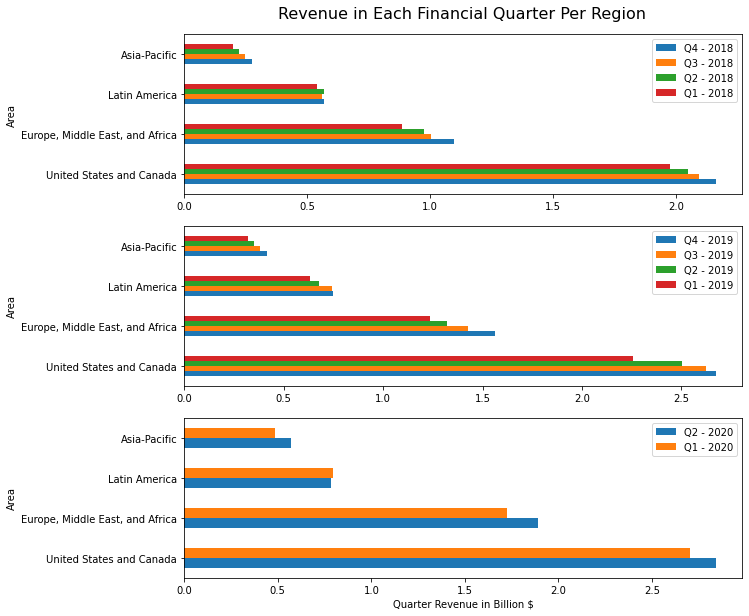

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
# fig.suptitle('Sharing both axes')
revenue_by_region.plot(kind='barh', x='Area', y=['Q4 - 2018', 'Q3 - 2018','Q2 - 2018','Q1 - 2018'], ax=axs[0])
revenue_by_region.plot(kind='barh', x='Area', y=['Q4 - 2019', 'Q3 - 2019','Q2 - 2019','Q1 - 2019'], ax=axs[1])
revenue_by_region.plot(kind='barh', x='Area', y=['Q2 - 2020', 'Q1 - 2020'], ax=axs[2])
plt.xlabel("Quarter Revenue in Billion $")
plt.text(0.5,13.5, "Revenue in Each Financial Quarter Per Region", fontsize=16)
plt.savefig("../../output/1_revenue_quarter_by_region.png")
plt.show()



In [8]:
revenue_by_region.columns

Index(['Area', 'Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019',
       'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020'],
      dtype='object')

# Revenue by region

## The regions that seem to generate the most revenue by subscriber are the USA + Canada and Europe-Middle East-Africa. 


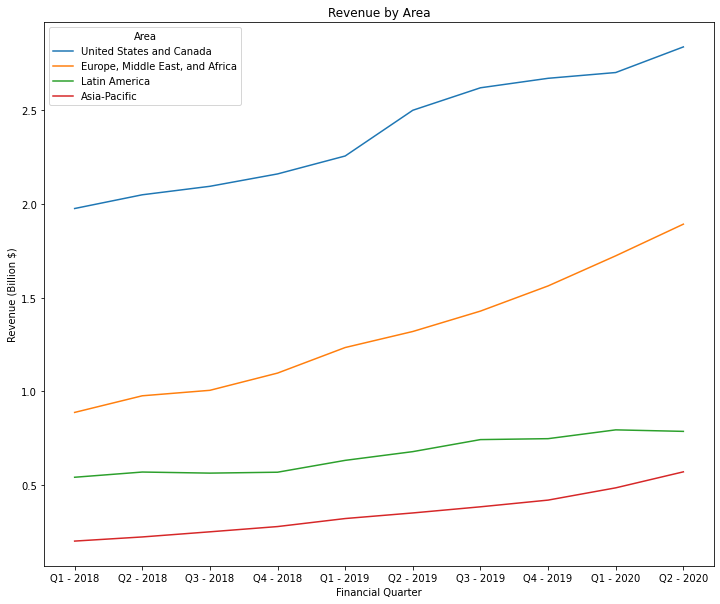

In [13]:

quarters_revenue = pd.melt(revenue_by_region, id_vars="Area", var_name="Quaters", value_name="revenue")
plt.figure(figsize=(12,10))
sns.lineplot(data=quarters_revenue, x="Quaters", y="revenue", hue="Area")
plt.title('Revenue by Area')
plt.xlabel("Financial Quarter")
plt.ylabel("Revenue (Billion $)")
plt.savefig("../../output/1_revenue_by_area.png")
plt.show()

In [14]:
percentage_revenue = revenue_by_region.copy()

In [15]:
revenue_by_region

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,1.976157,2.049546,2.094850,2.160979,2.256851,2.501199,2.621250,2.671908,2.702776,2.839670
1,"Europe, Middle East, and Africa",0.886649,0.975497,1.004749,1.096812,1.233379,1.319087,1.428040,1.562561,1.723474,1.892537
2,Latin America,0.540182,0.568071,0.562307,0.567137,0.630472,0.677136,0.741434,0.746392,0.793453,0.785368
3,Asia-Pacific,0.199117,0.221252,0.248691,0.276756,0.319602,0.349494,0.382304,0.418121,0.483660,0.569140


In [16]:
pct_change = percentage_revenue[['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019',
                   'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']].pct_change(axis=1).fillna(0)
pct_change["Area"] = percentage_revenue["Area"]
pct_change

,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020,Area
0,0.0,0.037137,0.022104,0.031567,0.044365,0.108269,0.047997,0.019326,0.011553,0.050649,United States and Canada
1,0.0,0.100207,0.029987,0.091628,0.124513,0.069490,0.082597,0.094200,0.102980,0.098094,"Europe, Middle East, and Africa"
2,0.0,0.051629,-0.010147,0.008590,0.111675,0.074014,0.094956,0.006687,0.063051,-0.010190,Latin America
3,0.0,0.111166,0.124017,0.112851,0.154815,0.093529,0.093879,0.093687,0.156746,0.176736,Asia-Pacific


# Revenue Growth by Area

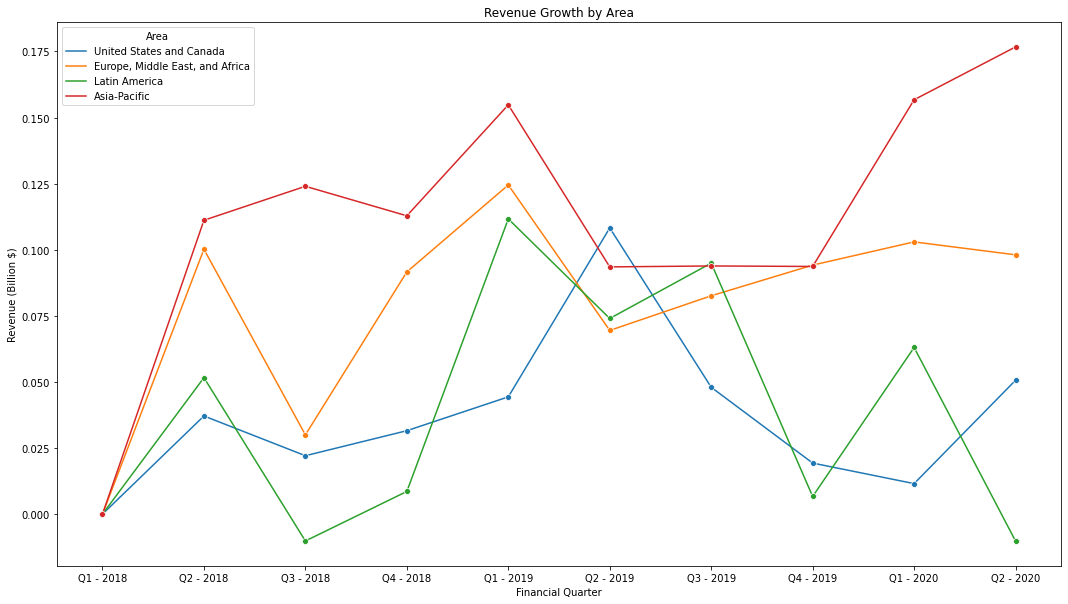

In [18]:
pct_change_two=pd.melt(pct_change, id_vars="Area", var_name="Quaters", value_name="revenue" )
plt.figure(figsize=(18,10))
sns.lineplot(data=pct_change_two, x="Quaters", y="revenue", hue="Area", marker="o")
plt.title('Revenue Growth by Area')
plt.xlabel("Financial Quarter")
plt.ylabel("Revenue (Billion $)")
plt.savefig("../../output/1_revenue_growth_area.png")
plt.show()